# ML - Supervised - Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split as TTS
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RF

In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

## Labelised Data

In [2]:
#Chargement
#df = pd.read_csv("data/filename.csv")
df = sns.load_dataset('iris')

### Training

In [3]:
#Isolation
#target_feature_name = 'target_feature'
target_feature_name = 'species'
Y = df[target_feature_name]
X = df.drop(columns=target_feature_name)

In [4]:
#Classes/Labels
classes = Y.astype('category').cat.categories.tolist()

In [5]:
#TTS
X_tr, X_te, Y_tr, Y_te = TTS(X, Y, stratify=Y, random_state=314)

In [6]:
#Pipeline
pipeline_details = [('PCA', PCA(random_state=20)),
                    ('RF', RF())]
pipeline = Pipeline(steps=pipeline_details)

In [7]:
#GridSearchCV

hyperparameters = {}
hyperparameters['PCA__n_components'] = [i for i in range(1, X_tr.shape[1]+1)]
hyperparameters['RF__n_estimators']  = [i for i in range(1, 250 +1, 10)]

hyperparameter_search = GridSearchCV(pipeline,
                                     hyperparameters,
                                     scoring='accuracy', 
                                     cv=5)

hyperparameter_search.fit(X_tr, Y_tr)

print('Meilleur score : {:.5f}'.format(hyperparameter_search.best_score_))
print('Meilleur paramètres : {}'.format(hyperparameter_search.best_params_))

Meilleur score : 0.98182
Meilleur paramètres : {'PCA__n_components': 2, 'RF__n_estimators': 141}


In [8]:
#PCA
N=hyperparameter_search.best_params_['PCA__n_components']
pca = PCA(n_components=N, random_state=20)
pca.fit(X_tr);

In [9]:
#Transform
X_tr_PCA = pca.transform(X_tr)
X_te_PCA = pca.transform(X_te)

In [10]:
#RF
N=hyperparameter_search.best_params_['RF__n_estimators']
rf = RF(n_estimators=N)
rf.fit(X_tr_PCA, Y_tr);

In [11]:
#Accuracy du training
train_preds = rf.predict(X_tr_PCA)
accuracy = lambda p, y : (p==y).sum()/len(y)
print('Accuracy : {}'.format(accuracy(train_preds, Y_tr)))

Accuracy : 1.0


## Unlabelised Data

In [12]:
#Chargement
#df = pd.read_csv("data/filename.csv")
df = pd.DataFrame(X_te_PCA)

### Prediction

In [13]:
#RF
preds = rf.predict(df)
proba = rf.predict_proba(df)

## Result

In [31]:
df = pd.DataFrame(X_te)
df['Predictions'] = preds
for i in range(0, len(proba[0])):
    df[classes[i]] = proba[:, i]

#for k in range(0, len(proba)):
#    print('iris[', k, ']')
#    for i in range(0, len(proba[0])):
#        print('{} {}= {}'.format(classes[i], (10-len(classes[i]))*' ', proba[k][i]))

df

,sepal_length,sepal_width,petal_length,petal_width,Predictions,setosa,versicolor,virginica
93,5.0,2.3,3.3,1.0,versicolor,0.099291,0.865248,0.035461
90,5.5,2.6,4.4,1.2,versicolor,0.000000,1.000000,0.000000
83,6.0,2.7,5.1,1.6,virginica,0.000000,0.092199,0.907801
48,5.3,3.7,1.5,0.2,setosa,0.950355,0.000000,0.049645
35,5.0,3.2,1.2,0.2,setosa,0.985816,0.014184,0.000000
50,7.0,3.2,4.7,1.4,virginica,0.092199,0.382979,0.524823
42,4.4,3.2,1.3,0.2,setosa,0.900709,0.099291,0.000000
106,4.9,2.5,4.5,1.7,versicolor,0.099291,0.879433,0.021277
34,4.9,3.1,1.5,0.2,setosa,0.957447,0.042553,0.000000
66,5.6,3.0,4.5,1.5,versicolor,0.007092,0.985816,0.007092


## Matrice de confusion

In [15]:
from sklearn.metrics import confusion_matrix
def show_cm(cm, labels):
    df_cm = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df_cm, annot=True)
    plt.show()

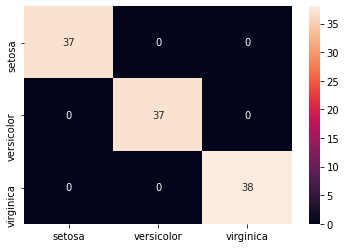

Accuracy : 1.0


In [16]:
cm_train = confusion_matrix(train_preds, Y_tr, labels=classes)
show_cm(cm_train, classes)
#Accuracy du training
accuracy = lambda p, y : (p==y).sum()/len(y)
print('Accuracy : {}'.format(accuracy(train_preds, Y_tr)))

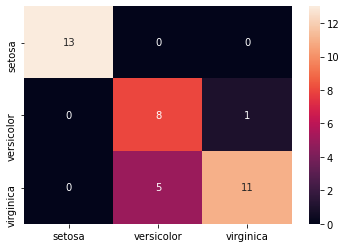

Accuracy : 0.8421052631578947


In [17]:
cm_test = confusion_matrix(preds, Y_te, labels=classes)
show_cm(cm_test, classes)
#Accuracy du training
accuracy = lambda p, y : (p==y).sum()/len(y)
print('Accuracy : {}'.format(accuracy(preds, Y_te)))